# INTERPRETABILITY AND FAIRNESS PROJECT 

##  EXPLORATION ANALYSIS </center> 


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### DATA EXPLO

In [4]:
# reading dataset using panda
data_path = os.path.dirname(os.getcwd())
data_df = pd.read_csv(os.path.join(data_path, "data\\data_income.csv"))

# information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


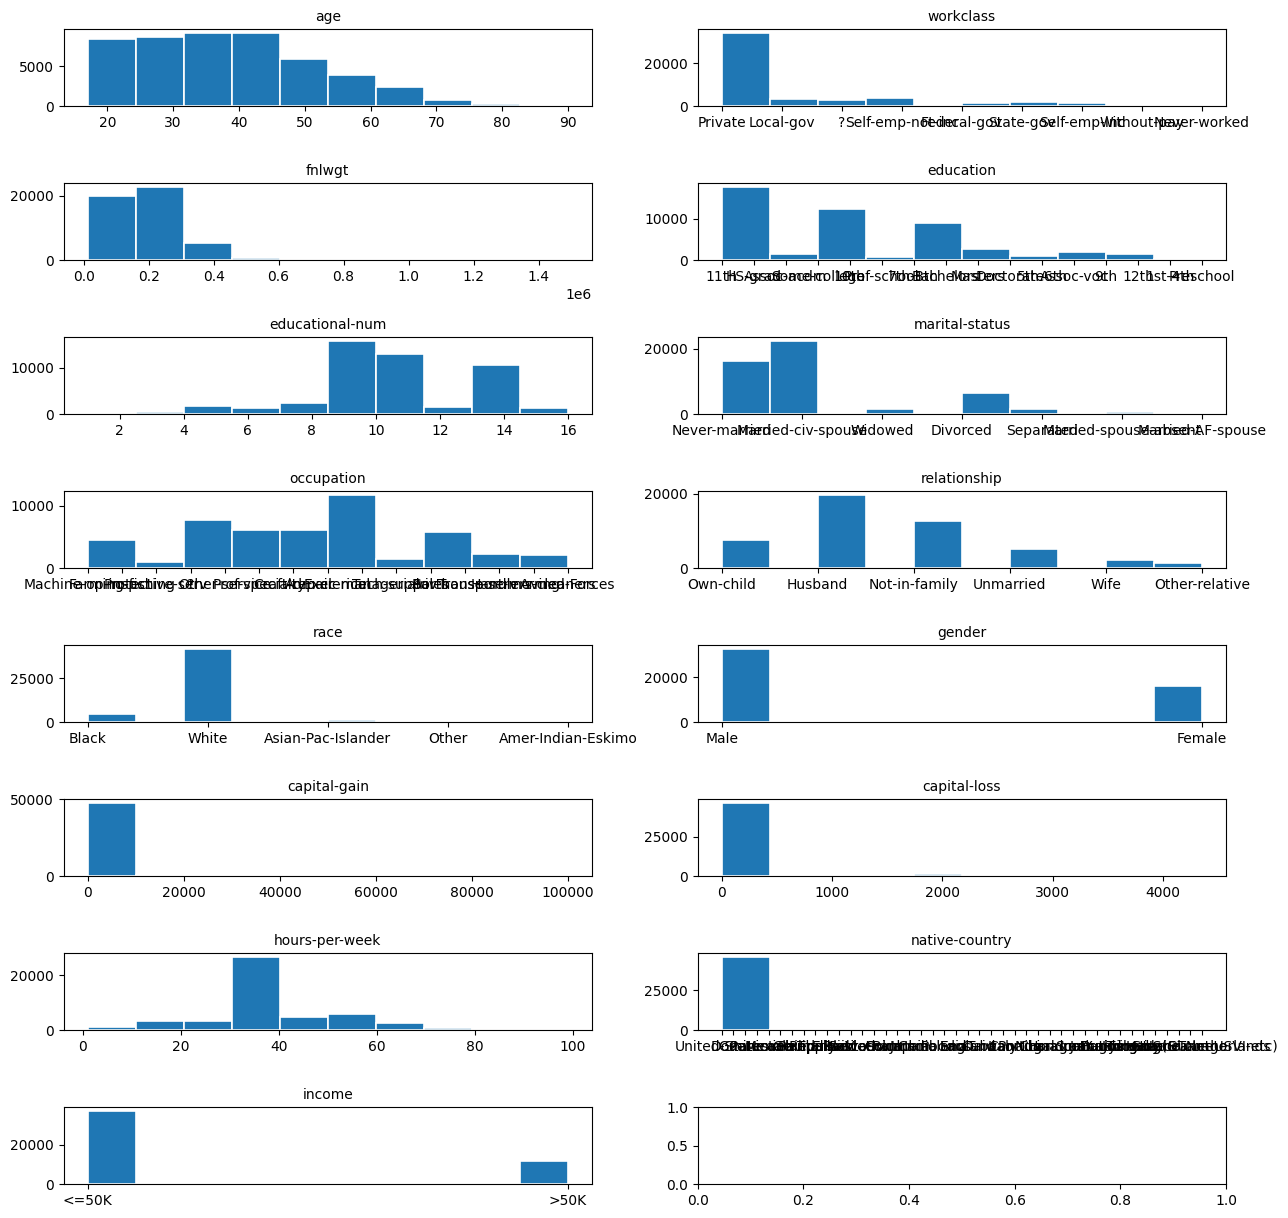

In [3]:
# visualize the data
data_features = data_df.columns

fig, axs = plt.subplots(8, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=1)

for col, ax in zip(data_features, axs.flat):
    ax.hist(data_df[col], edgecolor="white", linewidth=1.2)
    ax.set_title(col, fontsize=10)


##### Fields
The dataset contains **16 columns**


##### Target filed: Income
-- The income is divide into two classes: **<=50K and >50K**


##### Number of attributes: 14
-- These are the demographics and other features to describe a person


##### Categorical Attributes:
- workclass (Individual work category).
- education (The highest education degree for the person).
- marital-status: (Individual marital status).
- occupation: (Individual's occupation) .
- relationship: (Individual's relation in a family).
- race: (Race of Individual).
- sex: Female, Male.
- native-country: (Individual's native country).


##### Continuous Attributes:
- age: (Age of an individual).
- education-num: (Individual's year of receiving education).
- fnlwgt: final weight.
- capital-gain.
- capital-loss.
- hours-per-week: (Individual's working hour per week).

In [4]:
data_df["income"].value_counts()


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [5]:
data_df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [6]:
# native-country distrib : mainly americain
print(data_df["native-country"].unique())
data_df["native-country"].value_counts()

['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

<AxesSubplot:xlabel='gender', ylabel='count'>

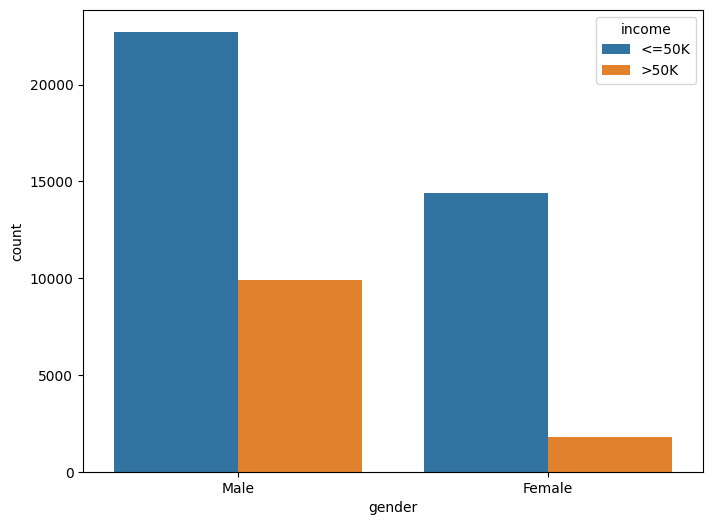

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="income", data=data_df)


In [8]:
# #pair plots of entire dataset
# pp = sns.pairplot(data_df, hue = 'income', palette = 'deep',
#                   size=3, diag_kind = 'kde', diag_kws=dict(fill=True), plot_kws=dict(s=20) )
# pp.set(xticklabels=[])

c:\Users\const\Anaconda\envs\inter-fair-env\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

### DATA PREPROCESSING

## Data Preprocessing Summary

### One-Hot Encoded Variables with Prefix:
- 'occupation'
- 'workclass'
- 'marital-status'
- 'relationship'
- 'race'
- 'native-country'

### Mapped Features:
- 'gender': Male = 1, Female = 0
- 'income': >50K = 1, <=50K = 0


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
    "income",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

df = data_df[categorical_cols].apply(LabelEncoder().fit_transform)

In [28]:
df_encoded = pd.concat([df, data_df[numeric_cols]], axis=1)

<AxesSubplot:>

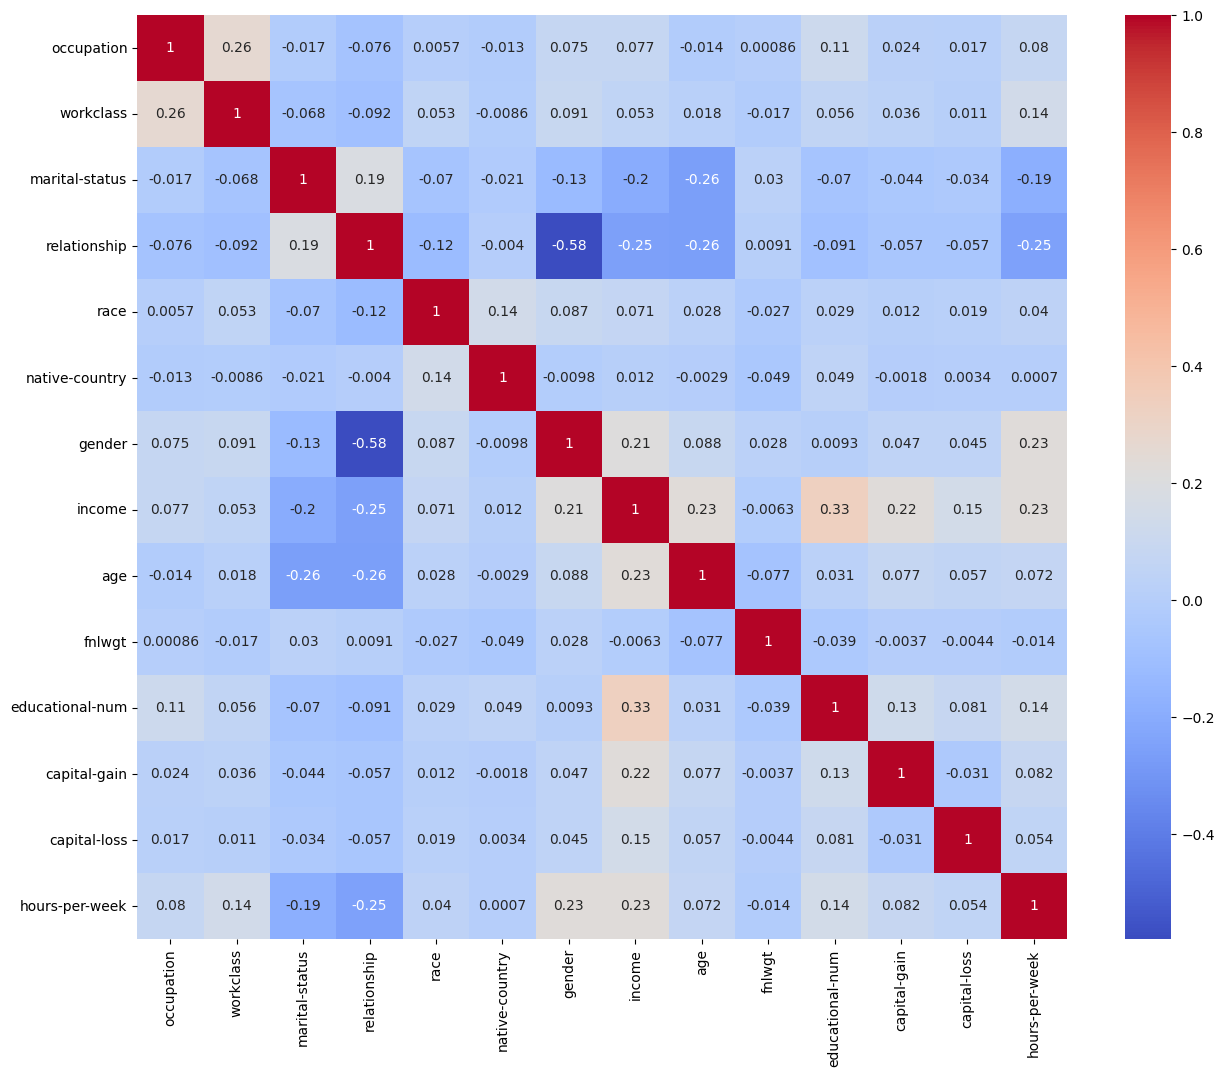

In [29]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True)